# I have tested various regression models for car pricing prediction dataset, below code represents EDA, Feature Selection and Model training 

Do check it out as i embark on building machine learning models!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
print(df.transmission.unique())
print(df.model.unique())
print(df.fuelType.unique())

['Automatic' 'Manual' 'Semi-Auto']
[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


In [6]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

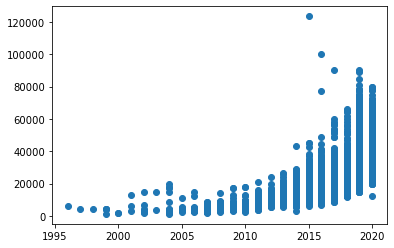

In [7]:
plt.scatter(x=df['year'], y=df['price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

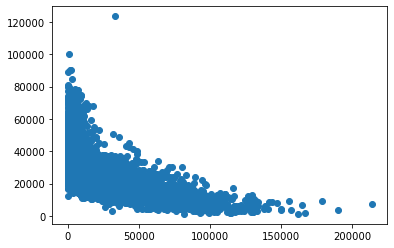

In [17]:
plt.scatter(x=df['mileage'], y=df['price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

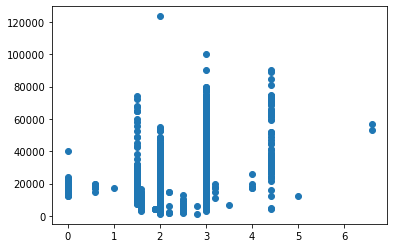

In [8]:
plt.scatter(x=df['engineSize'], y=df['price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

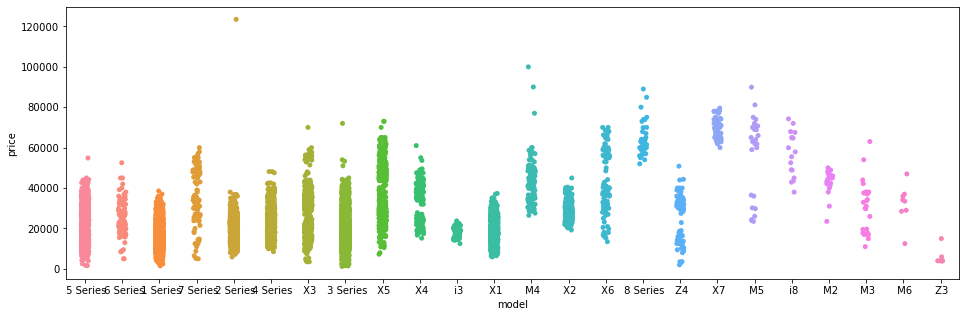

In [9]:
plt.figure(figsize=(16,5))
sns.stripplot(x="model", y="price", data=df)
plt.show

In [27]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


<function matplotlib.pyplot.show(close=None, block=None)>

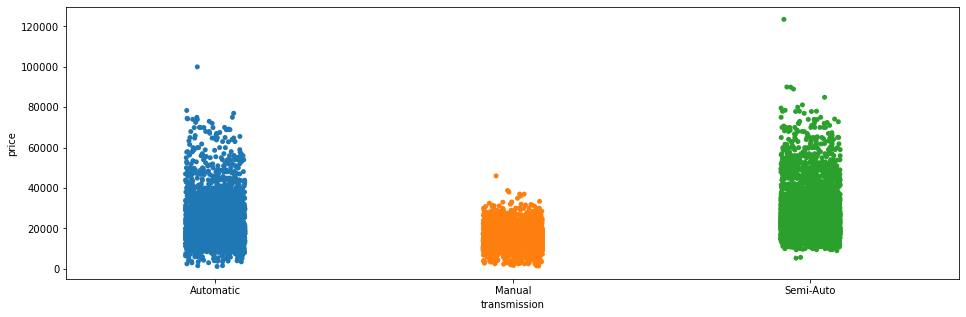

In [10]:
plt.figure(figsize=(16,5))
sns.stripplot(x="transmission", y="price", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

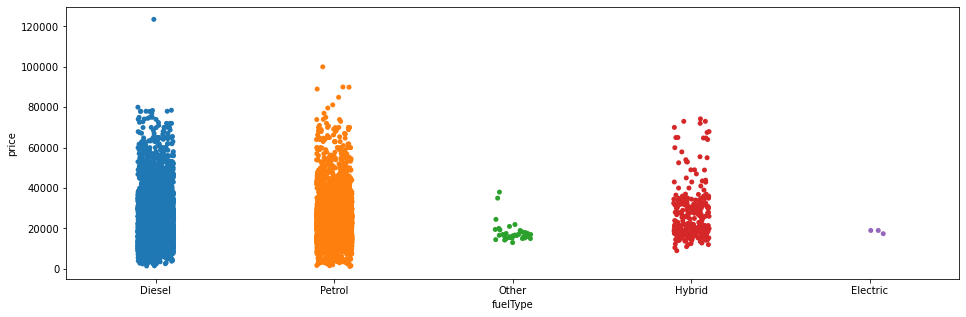

In [11]:
plt.figure(figsize=(16,5))
sns.stripplot(x="fuelType", y="price", data=df)
plt.show

# Model 1


In [12]:
features= ['year','transmission','mileage','fuelType','engineSize']

df2= df.drop(['model','tax','mpg'], axis=1)
print(df2)

       year  price transmission  mileage fuelType  engineSize
0      2014  11200    Automatic    67068   Diesel         2.0
1      2018  27000    Automatic    14827   Petrol         2.0
2      2016  16000    Automatic    62794   Diesel         3.0
3      2017  12750    Automatic    26676   Diesel         1.5
4      2014  14500    Automatic    39554   Diesel         3.0
...     ...    ...          ...      ...      ...         ...
10776  2016  19000    Automatic    40818   Diesel         2.0
10777  2016  14600    Automatic    42947   Diesel         2.0
10778  2017  13100       Manual    25468   Petrol         2.0
10779  2014   9930    Automatic    45000   Diesel         2.0
10780  2017  15981    Automatic    59432   Diesel         2.0

[10781 rows x 6 columns]


In [13]:
df2= df.drop(['model','tax','mpg'], axis=1)

d = {'Diesel':0, 'Petrol':1, 'Other':2 , 'Hybrid':3, 'Electric':4}
df2['fuelType'] = df2['fuelType'].map(d)

d1 ={'Automatic':0, 'Manual':1, 'Semi-Auto':2}
df2['transmission'] = df2['transmission'].map(d1)

print(df2)

       year  price  transmission  mileage  fuelType  engineSize
0      2014  11200             0    67068         0         2.0
1      2018  27000             0    14827         1         2.0
2      2016  16000             0    62794         0         3.0
3      2017  12750             0    26676         0         1.5
4      2014  14500             0    39554         0         3.0
...     ...    ...           ...      ...       ...         ...
10776  2016  19000             0    40818         0         2.0
10777  2016  14600             0    42947         0         2.0
10778  2017  13100             1    25468         1         2.0
10779  2014   9930             0    45000         0         2.0
10780  2017  15981             0    59432         0         2.0

[10781 rows x 6 columns]


In [14]:
X = df2[['year','mileage','transmission','fuelType','engineSize']]
y = df2['price']

from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X,y)

print(regr.coef_)

prdictedprice = regr.predict([[2021,100000,2,0,2]])

print(prdictedprice)

[ 2.05610831e+03 -1.18082970e-01  9.62786053e+01  1.41882305e+03
  9.94909597e+03]
[19837.12404638]


In [15]:
test_df = df2.loc[7000:]

y_test = test_df['price']

X_test = test_df[['year','mileage','transmission','fuelType','engineSize']]

y_pred = regr.predict(X_test)

print(y_pred)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(r2)

[26963.37209396 26520.52484541 23996.35547532 ... 21736.19516136
 11746.37202453 16210.52352375]
0.5987037616808654


# Model 2

In [16]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ year + mileage + transmission + fuelType + engineSize', data=df2)

results =model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     4066.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:10:44   Log-Likelihood:            -1.1031e+05
No. Observations:               10781   AIC:                         2.206e+05
Df Residuals:                   10775   BIC:                         2.207e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.144e+06   8.82e+04    -46.963   

# Model 3

In [17]:
from scipy import stats

r value of given problem: -0.6053967672218263
p value of given problem: 0.0
0.0034806300464877296
-0.27486262317217686 29741.577473684163


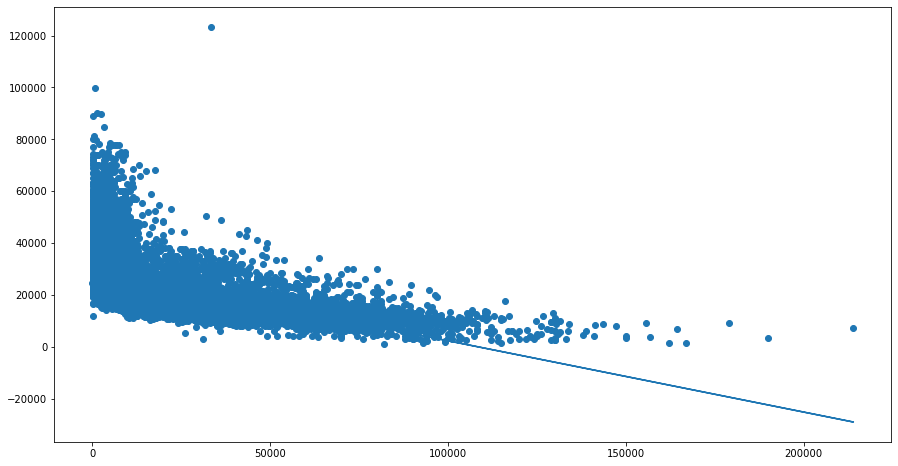

In [52]:
X = df['mileage']
y = df['price']

slope, intercept, r, p ,std_err = stats.linregress(X,y)

def myfunc(X):
    return slope*X  + intercept

mymodel = list(map(myfunc, X))

fig, ax =plt.subplots()

ax.scatter(X,y)
ax.plot(X, mymodel)
fig.set_size_inches(15,8)
fig.show

print("r value of given problem:", r)
print("p value of given problem:", p)
print(std_err)
print(slope, intercept)


# Model 4

In [47]:
from sklearn import linear_model

X = df[['mileage', 'year']]
y = df['price']

regr = linear_model.LinearRegression()

regr.fit(X,y)

print(regr.coef_)
print(regr.predict([[100000,2021]]))


test_df = df.loc[7000:,['mileage','year']]

y_test = df.loc[7000:,'price']

X_test = test_df[['mileage','year']]

y_pred = regr.predict(X_test)

print(y_pred)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(r2)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print(MSE)

[-1.38782351e-01  1.88091974e+03]
[19768.91377451]
[29441.89975734 28695.11192813 27334.34843946 ... 22588.96098151
 14235.50488985 17875.35722177]
0.3625057967855111
56219829.28710107
